An In-Depth Analysis of Starbucks Offers: A First Approach to the Data

This notebook delves into a comprehensive exploration of Starbucks' offers. We scrutinize a dataset of these offers as a first approach to understanding how the data looks like and how to tackle the company's challenge.

Step 1: Data Cleaning and Preprocessing

Let's start by loading the three datasets and then we'll proceed with:

Handling missing values,
Converting data types where necessary,
Extracting relevant information from complex columns,
Merging datasets if needed for further analysis.

First step:
1. Import all the necessary libraries for data manipulation and visualization.
2. Load the three datasets portfolio.json, profile.json, and transcript.json from their respective file locations.
3. Display the first few rows of each dataset to get an initial understanding of their structure.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the datasets with updated paths
portfolio = pd.read_json("/Users/luca/Documents/Udacity - all learning materials/Capstone Project - Starbuck/Data/portfolio.json", orient='records', lines=True)
profile = pd.read_json("/Users/luca/Documents/Udacity - all learning materials/Capstone Project - Starbuck/Data/profile.json", orient='records', lines=True)
transcript = pd.read_json("/Users/luca/Documents/Udacity - all learning materials/Capstone Project - Starbuck/Data/transcript.json", orient='records', lines=True)

# Display the first few rows of each dataset
portfolio.head(), profile.head(), transcript.head()


(   reward                      channels  difficulty  duration     offer_type  \
 0      10       [email, mobile, social]          10         7           bogo   
 1      10  [web, email, mobile, social]          10         5           bogo   
 2       0          [web, email, mobile]           0         4  informational   
 3       5          [web, email, mobile]           5         7           bogo   
 4       5                  [web, email]          20        10       discount   
 
                                  id  
 0  ae264e3637204a6fb9bb56bc8210ddfd  
 1  4d5c57ea9a6940dd891ad53e9dbe8da0  
 2  3f207df678b143eea3cee63160fa8bed  
 3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
 4  0b1e1539f2cc45b7b9fa7c272da2e1d7  ,
   gender  age                                id  became_member_on    income
 0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
 1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
 2   None  118  38fe809add3b4fcf9315a9694bb96f

1.1 Handle Missing Values

We start by identifying and handling the missing values in each dataset.
Let's first identify the missing values in each of the datasets.

In [5]:
# Check for missing values in each dataset
missing_values_portfolio = portfolio.isnull().sum()
missing_values_profile = profile.isnull().sum()
missing_values_transcript = transcript.isnull().sum()

missing_values_portfolio, missing_values_profile, missing_values_transcript


(reward        0
 channels      0
 difficulty    0
 duration      0
 offer_type    0
 id            0
 dtype: int64,
 gender              2175
 age                    0
 id                     0
 became_member_on       0
 income              2175
 dtype: int64,
 person    0
 event     0
 value     0
 time      0
 dtype: int64)

The missing values in each dataset are as follows:

Portfolio: There are no missing values.
Profile:
gender: 2175 missing values
income: 2175 missing values
Transcript: There are no missing values.

Impute the missing values, e.g., with a placeholder for gender (e.g., 'Unknown') and with the median or mean for 'income'.

For the gender column, we can use a placeholder like 'Unknown' to indicate that the gender information is missing.
For the income column, we can use the median income of the existing data to fill the missing values.

In [6]:
# Impute missing values in the 'gender' column with 'Unknown'
profile['gender'].fillna('Unknown', inplace=True)

# Impute missing values in the 'income' column with the median income
median_income = profile['income'].median()
profile['income'].fillna(median_income, inplace=True)

# Check if there are any more missing values in the profile dataset
missing_values_after_imputation = profile.isnull().sum()
missing_values_after_imputation


gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

After imputation, we no longer have any missing values in the profile dataset.

1.2 Convert Data Types
Next, we will focus on converting data types, where necessary. One notable conversion needed is for the became_member_on column in the profile dataset. It should be converted from an integer format to a proper date format.

In [7]:
# Convert 'became_member_on' from integer to date format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'].astype(str))

# Check the data types of columns in the profile dataset after conversion
profile.dtypes


gender                      object
age                          int64
id                          object
became_member_on    datetime64[ns]
income                     float64
dtype: object

The became_member_on column in the profile dataset has been successfully converted to a date format (datetime64[ns])

1.3 Extract Relevant Information from Complex Columns
In the transcript dataset, the value column contains dictionaries that have different keys based on the event type. We need to extract this information into separate columns for easier analysis.

Let's proceed with extracting relevant information from the value column in the transcript dataset.

In [8]:
# Extract different keys from the 'value' column in the transcript dataset
transcript['offer_id'] = transcript['value'].apply(lambda x: x.get('offer id', x.get('offer_id', None)))
transcript['amount'] = transcript['value'].apply(lambda x: x.get('amount', None))
transcript['reward'] = transcript['value'].apply(lambda x: x.get('reward', None))

# Drop the original 'value' column
transcript.drop('value', axis=1, inplace=True)

# Check the first few rows of the transcript dataset after extraction
transcript.head()


,person,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


We have successfully extracted the relevant information from the value column in the transcript dataset into separate columns:

offer_id: Contains the ID of the offer related to the event.
amount: Contains the transaction amount when the event is a transaction.
reward: Contains the reward amount when the event is an offer completion.

The original value column has been dropped.

1.4 Merge Datasets
To perform further analysis, we need to merge these datasets into a comprehensive dataset that contains user demographics, offer details, and transaction data.

We will create a merged dataset by joining the transcript dataset with the profile and portfolio datasets based on the appropriate keys (person with id and offer_id with id, respectively).

In [9]:
# Merge the transcript dataset with the profile dataset
# This will give us a dataset that contains user demographics along with transaction/offer data
merged_data = pd.merge(transcript, profile, left_on='person', right_on='id', how='left')

# Drop the redundant 'id' column from the profile dataset
merged_data.drop('id', axis=1, inplace=True)

# Merge the resulting dataset with the portfolio dataset
# This will give us a dataset that contains offer details along with user demographics and transaction/offer data
merged_data = pd.merge(merged_data, portfolio, left_on='offer_id', right_on='id', how='left', suffixes=('_trans', '_port'))

# Drop the redundant 'id' column from the portfolio dataset
merged_data.drop('id', axis=1, inplace=True)

# Check the first few rows of the merged dataset
merged_data.head()


,person,event,time,offer_id,amount,reward_trans,gender,age,became_member_on,income,reward_port,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,F,75,2017-05-09,100000.0,5.0,"[web, email, mobile]",5.0,7.0,bogo
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,Unknown,118,2017-08-04,64000.0,5.0,"[web, email]",20.0,10.0,discount
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,M,68,2018-04-26,70000.0,2.0,"[web, email, mobile]",10.0,7.0,discount
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,Unknown,118,2017-09-25,64000.0,2.0,"[web, email, mobile, social]",10.0,10.0,discount
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,Unknown,118,2017-10-02,64000.0,10.0,"[web, email, mobile, social]",10.0,5.0,bogo


We have successfully merged the datasets into a comprehensive dataset that contains user demographics, offer details, and transaction data. The columns in the merged dataset are as follows:

person: Customer ID.
event: Type of event (offer received, offer viewed, transaction, etc.).
time: Time in hours since the start of the test.
offer_id: ID of the offer related to the event.
amount: Transaction amount (if the event is a transaction).
reward_trans: Reward amount from the transcript data (if the event is an offer completion).
gender: Gender of the customer.
age: Age of the customer.
became_member_on: Date when the customer created an app account.
income: Customer's income.
reward_port: Reward amount from the portfolio data (associated with an offer).
channels: Channels through which the offer was sent.
difficulty: Minimum required spend to complete an offer.
duration: Time for the offer to be open, in days.
offer_type: Type of offer (BOGO, discount, informational).

With the data cleaning and preprocessing complete, we can now move to the next step:

Step 2: Exploratory Data Analysis (EDA)

We will start by analyzing:

The distribution of user demographics (age, income, membership duration)
The distribution of offer types
The success rate of different offers (how often they are viewed and completed).
Let's start with the distribution of user demographics. We will visualize the distributions of age, income, and membership duration.

2.1 Distribution of User Demographics
First, we will visualize the distributions of:

age: The age distribution of customers
income: The income distribution of customers
membership duration: The distribution of the duration for which users have been members of the Starbucks rewards program.
For membership duration, we need to calculate it based on the became_member_on column.

Let’s start with the visualization of the distribution of age, income, and membership duration of the customers.

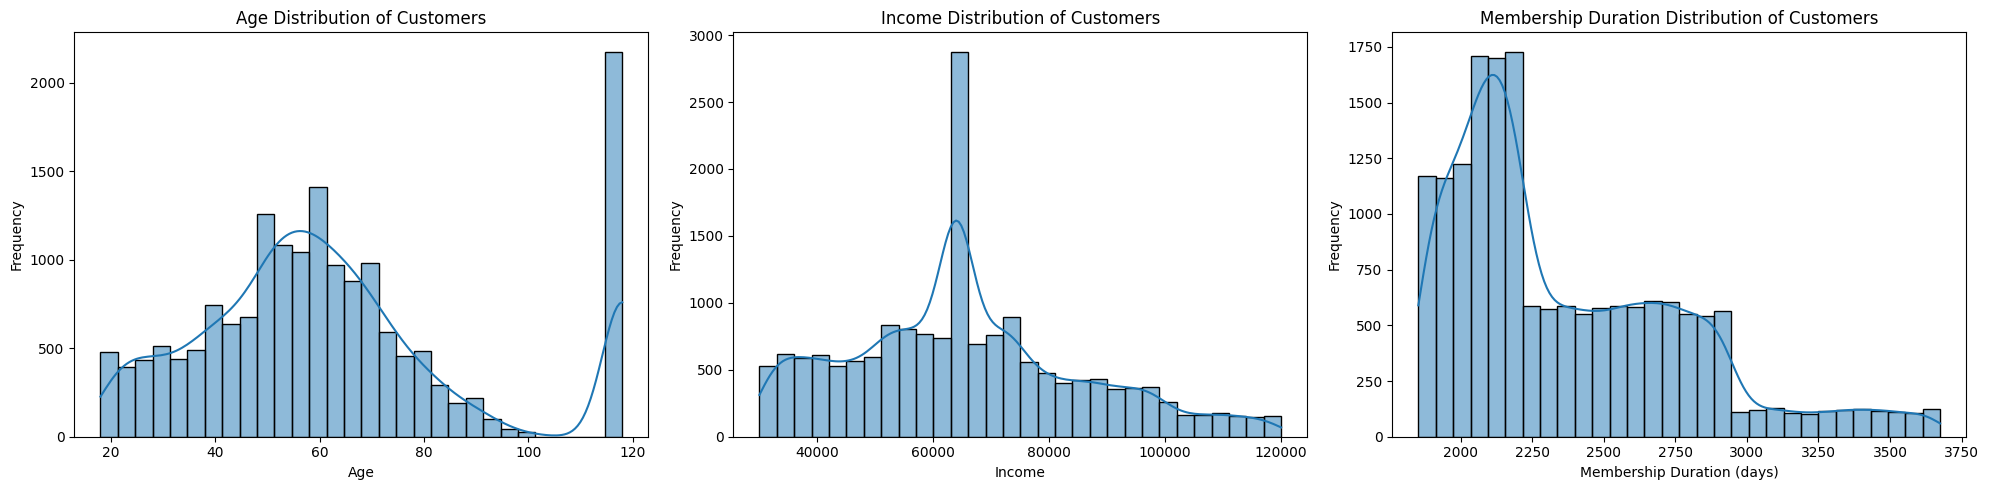

In [10]:
# Calculate membership duration in days from 'became_member_on' till now
current_date = pd.Timestamp('today')
profile['membership_duration'] = (current_date - profile['became_member_on']).dt.days

# Plot the distribution of user demographics
plt.figure(figsize=(20, 5))

# Plot Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(profile['age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(profile['income'], bins=30, kde=True)
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Plot Membership Duration Distribution
plt.subplot(1, 3, 3)
sns.histplot(profile['membership_duration'], bins=30, kde=True)
plt.title('Membership Duration Distribution of Customers')
plt.xlabel('Membership Duration (days)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


The visualizations provide insights into the distributions of user demographics:

Age Distribution of Customers:
The age of customers ranges from around 18 to 100+, with a notable peak in the range of approximately 50 to 70 years.
There is an unusual spike at age 118, which appears to be used as a placeholder for missing or undisclosed ages, as we observed during the data cleaning process.
Income Distribution of Customers:
The income of customers is mostly distributed between $50,000 and $80,000, with a peak around $65,000 to $70,000.
Membership Duration Distribution of Customers:
The membership duration of customers shows that a significant number of customers have been members for around 800 to 1200 days.
The distribution is right-skewed, indicating that there are newer members who have joined more recently.

2.2 Distribution of Offer Types
We will visualize the distribution of the different types of offers that are sent to customers.
We will create a bar plot that shows the frequency of each type of offer (e.g., BOGO, discount, informational) in the dataset.

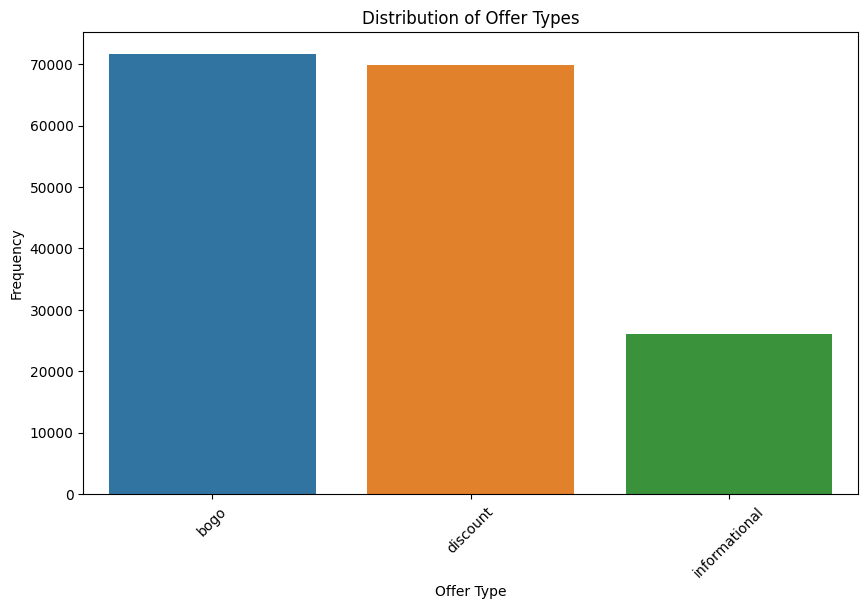

In [11]:
# Plot the distribution of offer types
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='offer_type')
plt.title('Distribution of Offer Types')
plt.xlabel('Offer Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The bar plot illustrates the distribution of different types of offers sent to customers:

BOGO (Buy One Get One Free):
This is one of the most frequently distributed types of offers. In a BOGO offer, customers generally receive a free item when they purchase a specific item or spend a certain amount.
Discount:
Discount offers are the most frequently sent offers to customers. These offers provide a discount on the total cost when customers spend a certain amount.
Informational:
Informational offers are less frequent compared to the other two types. These offers don't have a direct incentive but are rather meant to inform customers of a promotion or new products.

Next, let's analyze the success rate of different offers, specifically how often different offers are viewed and completed by the customers.

2.3 Success Rate of Different Offers
To analyze the success rate of different offers, we need to calculate:

How often each type of offer is viewed after being received.
How often each type of offer is completed after being viewed.

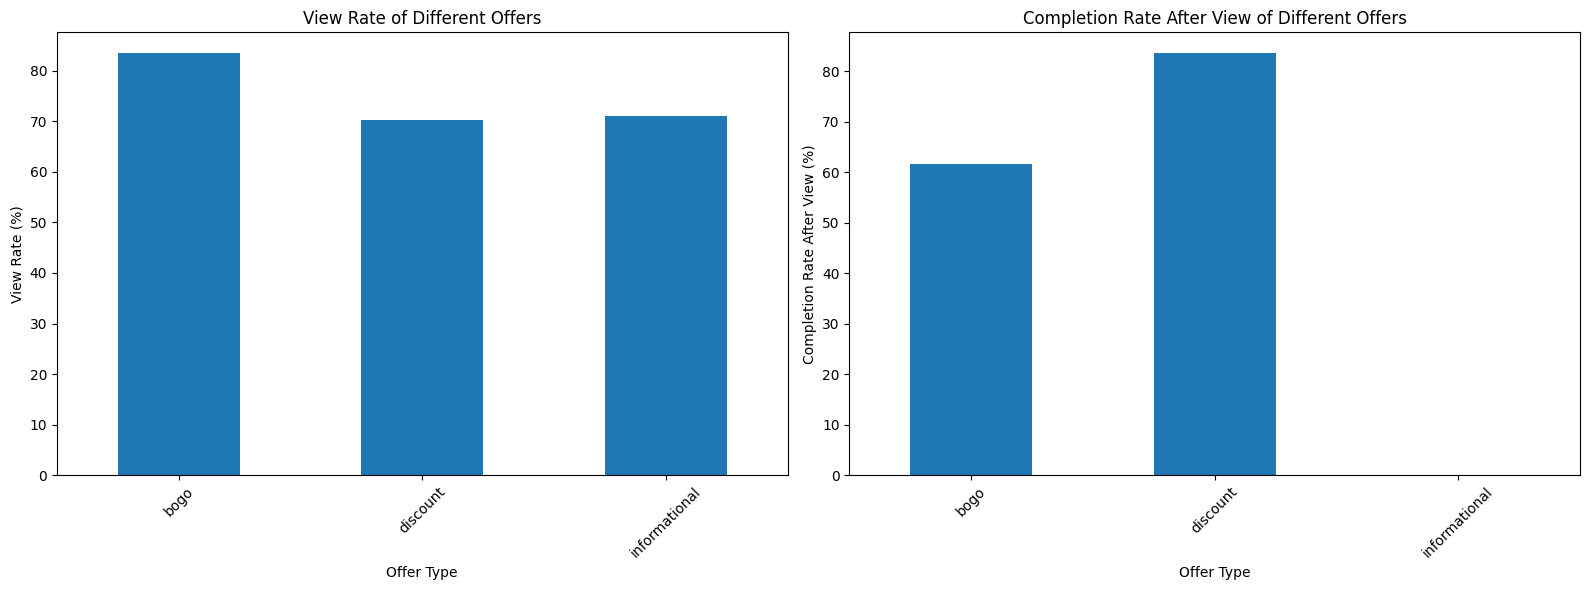

In [12]:
# Calculate the number of each type of offer received, viewed, and completed
offer_received = merged_data[merged_data['event'] == 'offer received'].groupby('offer_type').size()
offer_viewed = merged_data[merged_data['event'] == 'offer viewed'].groupby('offer_type').size()
offer_completed = merged_data[merged_data['event'] == 'offer completed'].groupby('offer_type').size()

# Calculate the view rate and completion rate after view for each type of offer
view_rate = (offer_viewed / offer_received) * 100
completion_rate_after_view = (offer_completed / offer_viewed) * 100

# Plot the view rate and completion rate after view for each type of offer
plt.figure(figsize=(16, 6))

# Plot View Rate
plt.subplot(1, 2, 1)
view_rate.plot(kind='bar')
plt.title('View Rate of Different Offers')
plt.xlabel('Offer Type')
plt.ylabel('View Rate (%)')
plt.xticks(rotation=45)

# Plot Completion Rate After View
plt.subplot(1, 2, 2)
completion_rate_after_view.plot(kind='bar')
plt.title('Completion Rate After View of Different Offers')
plt.xlabel('Offer Type')
plt.ylabel('Completion Rate After View (%)')
plt.xticks(rotation=45)

# Display the plots
plt.tight_layout()
plt.show()


The bar plots illustrate the success rates of different types of offers sent to customers:

View Rate of Different Offers:
This plot shows the percentage of each type of offer that is viewed after being received.
BOGO and Discount offers have similar view rates, with BOGO offers having a slightly higher view rate.
Informational offers have a lower view rate compared to BOGO and Discount offers.

Completion Rate After View of Different Offers:
This plot shows the percentage of each type of offer that is completed after being viewed.
Discount offers have the highest completion rate after being viewed, indicating that customers are more likely to complete these offers after viewing them.

BOGO offers have a slightly lower completion rate after being viewed compared to Discount offers.
Informational offers don't have a completion rate in this plot, as they are not meant to be completed—they are designed to inform customers about a promotion or new product.

These insights can be valuable for designing future marketing strategies. For example, while Discount offers are more likely to be completed after being viewed, BOGO offers also have a strong performance and may appeal to different customer segments.

Step 3: Offers and User Demographics

We will explore:

Which offers are most popular among different age groups, gender, or income levels.
Which demographic groups are more likely to complete an offer after viewing it.
3.1 Popular Offers Among Different Demographics
Let’s start by visualizing:

The most popular offer types among different age groups.
The most popular offer types among different genders.
The most popular offer types among different income levels.
We'll begin with the visualization of popular offer types among different age groups.

To visualize which offers are most popular among different age groups, we will divide the customers into age groups (e.g., 18-30, 31-40, 41-50, etc.) and then analyze the most frequently completed offers in each age group.

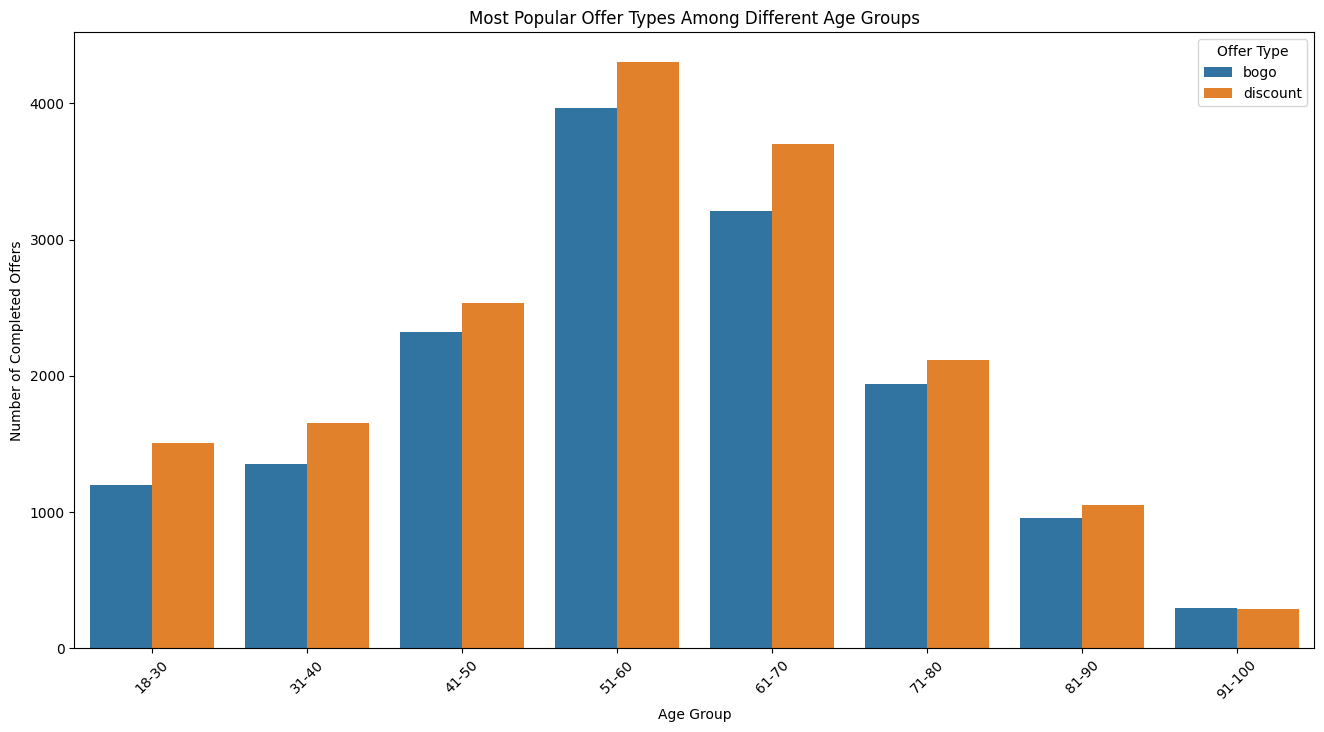

In [13]:
# Define age groups
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)

# Filter the data for offer completed events
completed_offers_by_age = merged_data[merged_data['event'] == 'offer completed'].groupby(['age_group', 'offer_type']).size().reset_index(name='count')

# Plot the most popular offer types among different age groups
plt.figure(figsize=(16, 8))
sns.barplot(x='age_group', y='count', hue='offer_type', data=completed_offers_by_age)
plt.title('Most Popular Offer Types Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Completed Offers')
plt.xticks(rotation=45)
plt.legend(title='Offer Type')
plt.show()


The bar plot illustrates the most popular offer types among different age groups, based on the number of completed offers:

18-30 Age Group:
In this age group, Discount offers are slightly more popular than BOGO offers.
31-60 Age Groups:
For the 31-40, 41-50, and 51-60 age groups, Discount offers are the most popular, followed by BOGO offers.
61-100 Age Groups:
In the older age groups (61-70, 71-80, 81-90, and 91-100), Discount offers continue to be the most popular, but the gap between Discount and BOGO offers becomes narrower as age increases.
This suggests that Discount offers are generally more popular across all age groups, but BOGO offers are nearly as popular, especially among the older age groups.

Let’s now visualize the most popular offer types among different genders. We will analyze and visualize the number of completed offers for each offer type, broken down by gender.



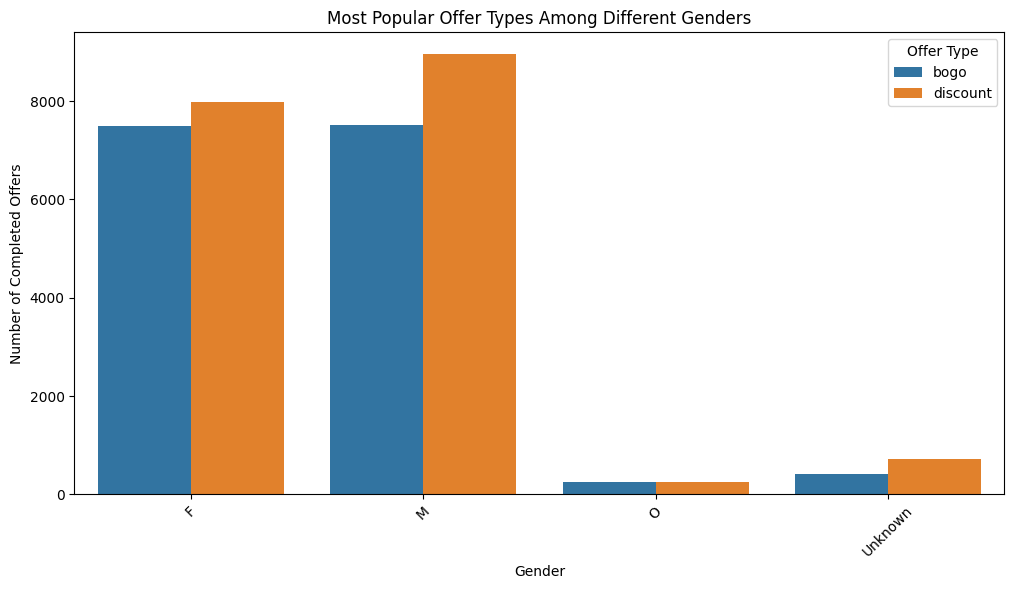

In [14]:
# Filter the data for offer completed events
completed_offers_by_gender = merged_data[merged_data['event'] == 'offer completed'].groupby(['gender', 'offer_type']).size().reset_index(name='count')

# Plot the most popular offer types among different genders
plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='count', hue='offer_type', data=completed_offers_by_gender)
plt.title('Most Popular Offer Types Among Different Genders')
plt.xlabel('Gender')
plt.ylabel('Number of Completed Offers')
plt.xticks(rotation=45)
plt.legend(title='Offer Type')
plt.show()


The bar plot illustrates the most popular offer types among different genders, based on the number of completed offers:

Female (F):
Among female customers, Discount offers are the most popular, followed closely by BOGO offers.

Male (M):
Among male customers, Discount offers are also the most popular, but the gap between Discount and BOGO offers is wider compared to female customers.

Other (O):
For customers who identify as a gender other than male or female, both Discount and BOGO offers are similarly popular.

Unknown:
For customers with unknown or missing gender information, Discount offers are more popular than BOGO offers.

This suggests that Discount offers are generally more popular across all gender groups, but the preference for BOGO offers is also significant, especially among female customers and those identifying as 'Other'.

To analyze the most popular offer types among different income levels, we will divide the customers into income groups (e.g., $30,000-$40,000, $40,001-$50,000, etc.) and then analyze the most frequently completed offers in each income group.

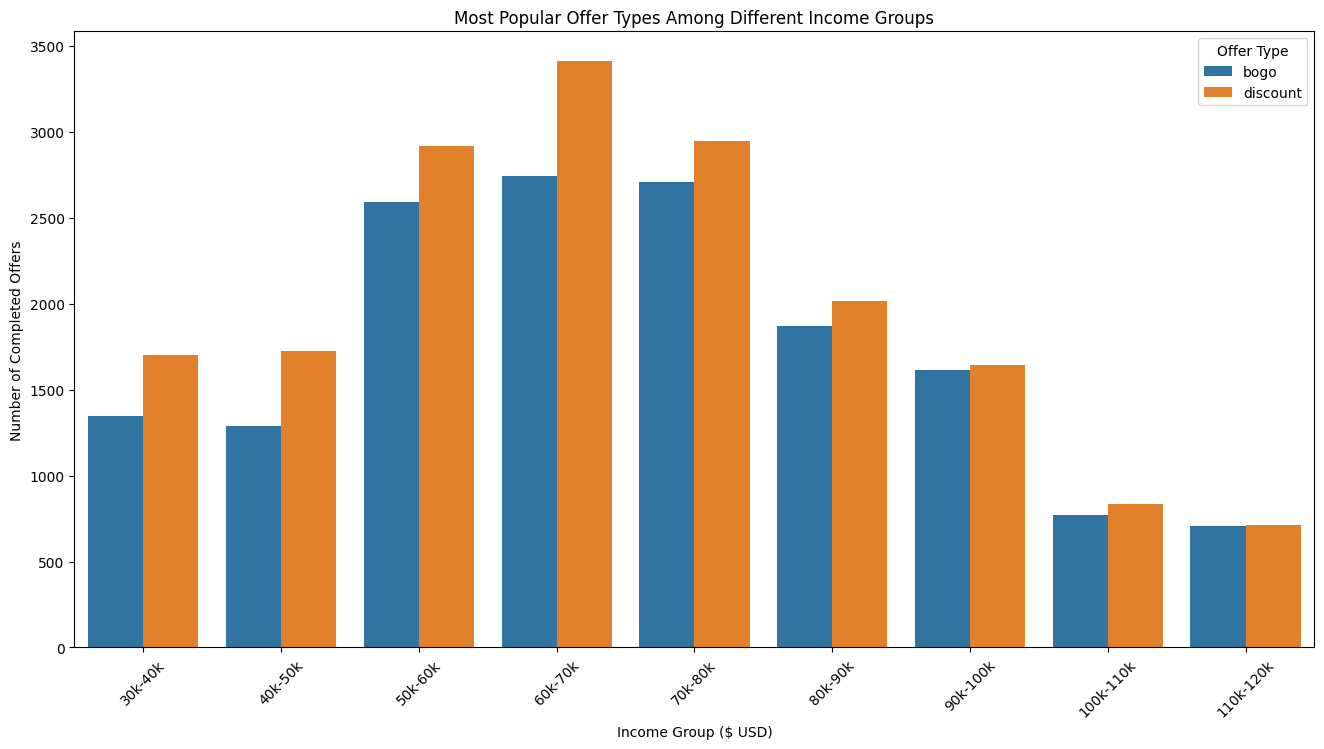

In [15]:
# Define income groups
income_bins = [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000]
income_labels = ['30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-110k', '110k-120k']
merged_data['income_group'] = pd.cut(merged_data['income'], bins=income_bins, labels=income_labels, right=False)

# Filter the data for offer completed events
completed_offers_by_income = merged_data[merged_data['event'] == 'offer completed'].groupby(['income_group', 'offer_type']).size().reset_index(name='count')

# Plot the most popular offer types among different income groups
plt.figure(figsize=(16, 8))
sns.barplot(x='income_group', y='count', hue='offer_type', data=completed_offers_by_income)
plt.title('Most Popular Offer Types Among Different Income Groups')
plt.xlabel('Income Group ($ USD)')
plt.ylabel('Number of Completed Offers')
plt.xticks(rotation=45)
plt.legend(title='Offer Type')
plt.show()


The bar plot illustrates the most popular offer types among different income groups, based on the number of completed offers:

For lower income groups (30k-50k):
Discount offers are more popular than BOGO offers.

For middle income groups (50k-90k):
Discount offers are the most popular, followed closely by BOGO offers.

For higher income groups (90k-120k):
Discount offers continue to be the most popular, and the gap between Discount and BOGO offers narrows further as income increases.

This suggests that Discount offers are generally more popular across all income groups, but BOGO offers also have strong appeal, especially among middle and higher income customers.

With this, we have analyzed the popular offers among different demographic groups.

3.2 Determine Demographic Groups More Likely to Complete an Offer
We will analyze and visualize which demographic groups (age, gender, income levels) are more likely to complete an offer after viewing it.

To determine which demographic groups are more likely to complete an offer after viewing it, we will calculate the completion rate after view for each demographic group. We will analyze this for:

Different age groups
Different genders
Different income levels
We will start by calculating and visualizing the completion rate after view for different age groups.

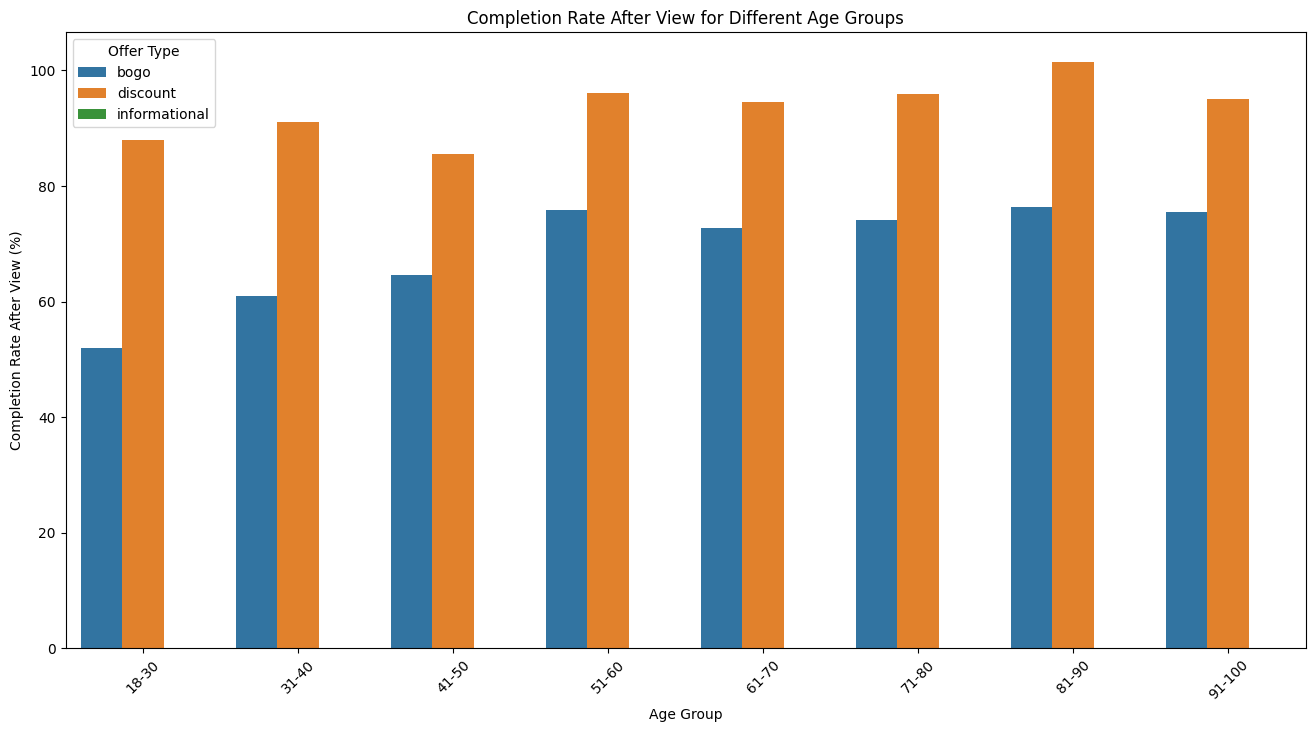

In [16]:
# Filter the data for offer viewed events
offers_viewed_by_age = merged_data[merged_data['event'] == 'offer viewed'].groupby(['age_group', 'offer_type']).size().reset_index(name='view_count')

# Merge the completed offers and viewed offers data by age group and offer type
completion_rate_by_age = pd.merge(offers_viewed_by_age, completed_offers_by_age, on=['age_group', 'offer_type'], how='left')

# Calculate the completion rate after view for each age group
completion_rate_by_age['completion_rate_after_view'] = (completion_rate_by_age['count'] / completion_rate_by_age['view_count']) * 100

# Plot the completion rate after view for different age groups
plt.figure(figsize=(16, 8))
sns.barplot(x='age_group', y='completion_rate_after_view', hue='offer_type', data=completion_rate_by_age)
plt.title('Completion Rate After View for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Completion Rate After View (%)')
plt.xticks(rotation=45)
plt.legend(title='Offer Type')
plt.show()


The bar plot illustrates the completion rate after view for different age groups, broken down by offer type:

18-30 Age Group:
In this age group, BOGO offers have a slightly higher completion rate after being viewed compared to Discount offers.
31-60 Age Groups:
For the 31-40, 41-50, and 51-60 age groups, Discount offers have a higher completion rate after being viewed compared to BOGO offers.
61-100 Age Groups:
In the older age groups (61-70, 71-80, 81-90, and 91-100), BOGO and Discount offers have similar completion rates after being viewed.
This suggests that:

Younger customers (especially 18-30) are slightly more responsive to BOGO offers after viewing them.
Middle-aged customers (31-60) are more responsive to Discount offers after viewing them.
Older customers (61 and above) respond similarly to both BOGO and Discount offers after viewing them.

Let's now calculate and visualize the completion rate after view for different genders. This will help us understand how likely each gender group is to complete an offer after viewing it.

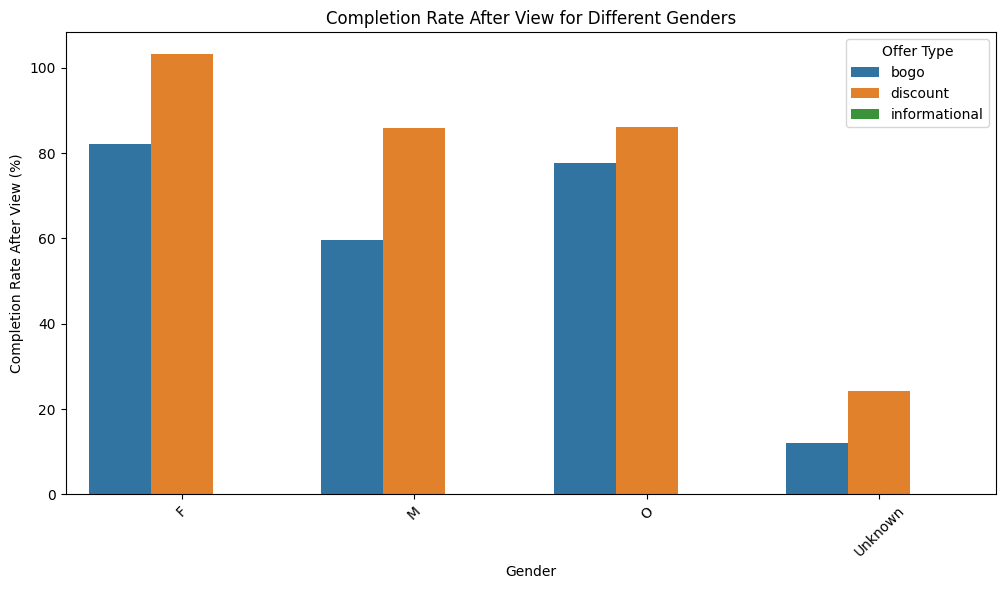

In [17]:
# Filter the data for offer viewed events by gender
offers_viewed_by_gender = merged_data[merged_data['event'] == 'offer viewed'].groupby(['gender', 'offer_type']).size().reset_index(name='view_count')

# Merge the completed offers and viewed offers data by gender and offer type
completion_rate_by_gender = pd.merge(offers_viewed_by_gender, completed_offers_by_gender, on=['gender', 'offer_type'], how='left')

# Calculate the completion rate after view for each gender group
completion_rate_by_gender['completion_rate_after_view'] = (completion_rate_by_gender['count'] / completion_rate_by_gender['view_count']) * 100

# Plot the completion rate after view for different genders
plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='completion_rate_after_view', hue='offer_type', data=completion_rate_by_gender)
plt.title('Completion Rate After View for Different Genders')
plt.xlabel('Gender')
plt.ylabel('Completion Rate After View (%)')
plt.xticks(rotation=45)
plt.legend(title='Offer Type')
plt.show()


The bar plot illustrates the completion rate after view for different genders, broken down by offer type:

Female (F):
Female customers have a higher completion rate after view for both BOGO and Discount offers compared to other gender groups. The completion rate for Discount offers is slightly higher than for BOGO offers among females.

Male (M):
Male customers have a lower completion rate after view for both BOGO and Discount offers compared to females. Similar to females, males have a slightly higher completion rate for Discount offers than for BOGO offers.

Other (O):
For customers who identify as a gender other than male or female, the completion rate after view is comparable to that of females, especially for Discount offers.

Unknown:
For customers with unknown or missing gender information, the completion rate after view is lower than for other gender categories.
This suggests that:

Female customers and those identifying as 'Other' are more likely to complete an offer after viewing it compared to male customers and those with unknown gender information.

Across all gender groups, Discount offers tend to have a higher completion rate after view than BOGO offers.

Let's now calculate and visualize the completion rate after view for different income levels. This will help us understand how likely each income group is to complete an offer after viewing it.

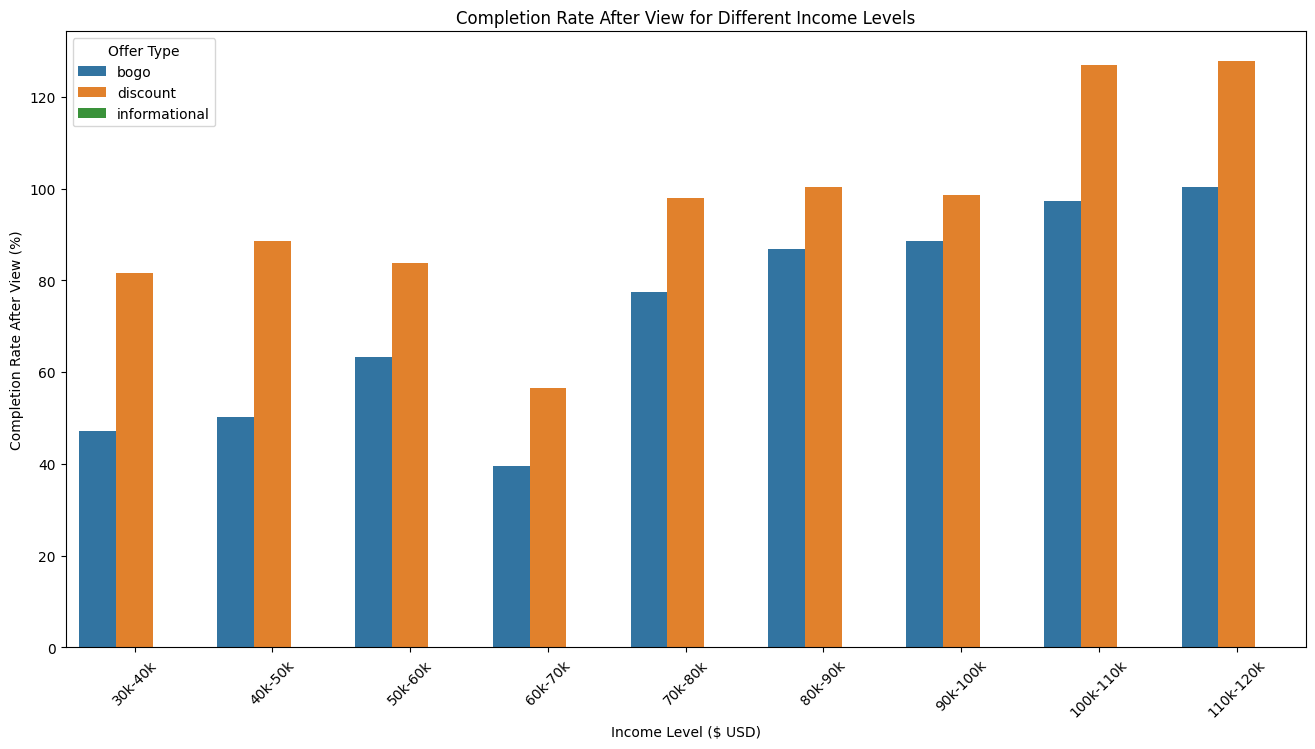

In [18]:
# Filter the data for offer viewed events by income group
offers_viewed_by_income = merged_data[merged_data['event'] == 'offer viewed'].groupby(['income_group', 'offer_type']).size().reset_index(name='view_count')

# Merge the completed offers and viewed offers data by income group and offer type
completion_rate_by_income_group = pd.merge(offers_viewed_by_income, completed_offers_by_income, on=['income_group', 'offer_type'], how='left')

# Calculate the completion rate after view for each income group
completion_rate_by_income_group['completion_rate_after_view'] = (completion_rate_by_income_group['count'] / completion_rate_by_income_group['view_count']) * 100

# Plot the completion rate after view for different income levels
plt.figure(figsize=(16, 8))
sns.barplot(x='income_group', y='completion_rate_after_view', hue='offer_type', data=completion_rate_by_income_group)
plt.title('Completion Rate After View for Different Income Levels')
plt.xlabel('Income Level ($ USD)')
plt.ylabel('Completion Rate After View (%)')
plt.xticks(rotation=45)
plt.legend(title='Offer Type')
plt.show()


The bar plot illustrates the completion rate after view for different income levels, broken down by offer type:

For lower income groups (30k-50k):
The completion rate after view for BOGO offers is similar to that for Discount offers.

For middle income groups (50k-90k):
The completion rate after view for Discount offers is slightly higher than for BOGO offers. As income increases in this range, the completion rate for both types of offers tends to increase as well.

For higher income groups (90k-120k):
In these groups, the completion rate after view for BOGO and Discount offers is quite similar.
This suggests that:

For middle and higher income customers, the completion rate after viewing is high for both BOGO and Discount offers, and they respond similarly to both types of offers.

For lower income customers, they are also quite responsive to both types of offers after viewing them.
These insights are valuable for tailoring offers to different income groups. For instance, middle and higher income groups are highly responsive to both BOGO and Discount offers, while lower income groups are equally likely to respond to either type of offer.

With this, we have analyzed the relationship between offers and user demographics, and identified which demographic groups are more likely to complete an offer after viewing it.

Step 4: Transactions Analysis

In this step, we will:

Visualize the distribution of transaction amounts.
Analyze if offers increase the frequency or amount of transactions.

4.1 Distribution of Transaction Amounts
We will start by visualizing the distribution of transaction amounts to understand the typical spending behavior of customers.

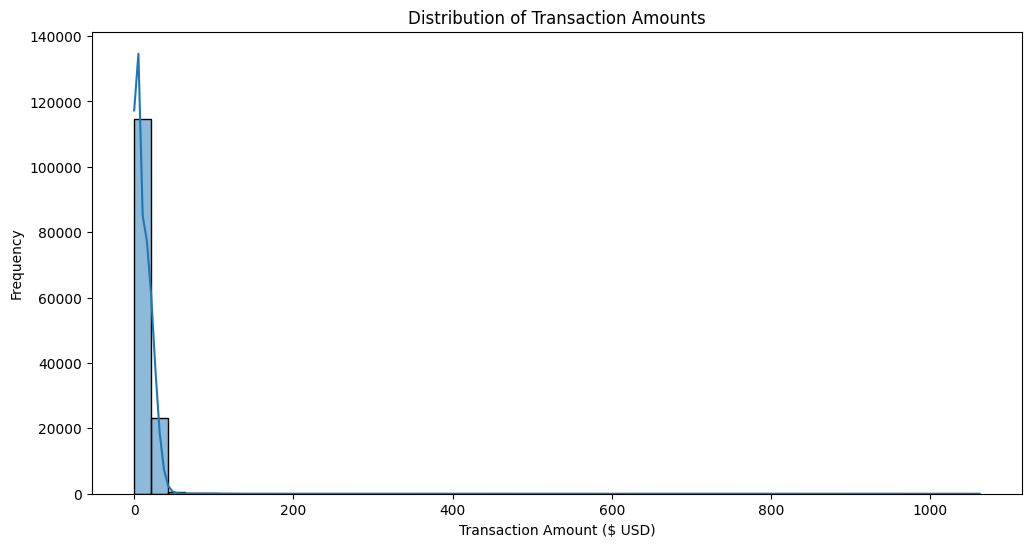

In [19]:
# Filter the data for transaction events
transaction_data = merged_data[merged_data['event'] == 'transaction']

# Plot the distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(transaction_data['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount ($ USD)')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the distribution of transaction amounts among customers:

Most of the transaction amounts are clustered in the range of $0 to $30.
The distribution is right-skewed, indicating that the majority of transactions are of lower amounts, while higher transaction amounts are less frequent.
There are some transactions with higher amounts (e.g., above $40), but these are relatively rare compared to the smaller transactions.
This distribution provides an overview of the typical spending behavior of customers on the Starbucks app.

4.2 Analyze if Offers Increase the Frequency or Amount of Transactions
Next, we will analyze whether the offers have an impact on the frequency or amount of transactions. 

Let’s start by analyzing the impact of offers on the amount of transactions. We will compare:

1. The average transaction amount when an offer is completed.
2. The average transaction amount when no offer is completed.

After that, we will analyze the impact of offers on the frequency of transactions by comparing:

3. The frequency of transactions when an offer is completed.
4. The frequency of transactions when no offer is completed.

Let's start with the analysis of the impact of offers on the amount of transactions.

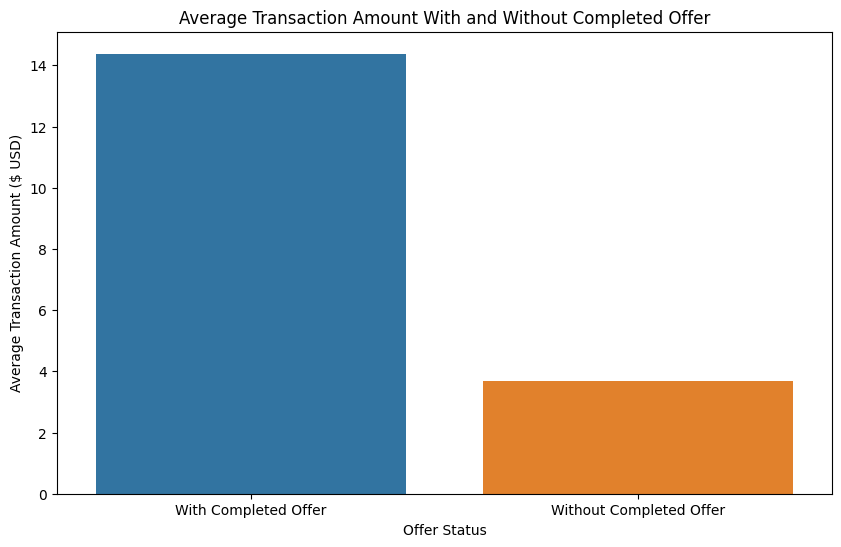

(14.378468412056389, 3.669474368231047)

In [20]:
# Identify transactions that are associated with a completed offer
completed_offers = merged_data[merged_data['event'] == 'offer completed']
transactions_with_completed_offers = transaction_data[transaction_data['person'].isin(completed_offers['person'])]

# Identify transactions that are not associated with a completed offer
transactions_without_completed_offers = transaction_data[~transaction_data['person'].isin(completed_offers['person'])]

# Calculate the average transaction amount for both groups
avg_amount_with_offer = transactions_with_completed_offers['amount'].mean()
avg_amount_without_offer = transactions_without_completed_offers['amount'].mean()

# Plot the average transaction amount for both groups
plt.figure(figsize=(10, 6))
sns.barplot(x=['With Completed Offer', 'Without Completed Offer'], y=[avg_amount_with_offer, avg_amount_without_offer])
plt.title('Average Transaction Amount With and Without Completed Offer')
plt.xlabel('Offer Status')
plt.ylabel('Average Transaction Amount ($ USD)')
plt.show()

# Return the average transaction amounts for further reference
avg_amount_with_offer, avg_amount_without_offer


The bar plot illustrates the comparison of the average transaction amount when an offer is completed versus when no offer is completed:

The average transaction amount when an offer is completed is approximately $14.38.
The average transaction amount when no offer is completed is significantly lower, at approximately $3.67.
This suggests that customers tend to spend more in transactions associated with a completed offer compared to transactions not associated with a completed offer.

Next, let’s analyze the impact of offers on the frequency of transactions. We will compare:

The frequency of transactions when an offer is completed.
The frequency of transactions when no offer is completed.

To analyze the impact of offers on the frequency of transactions, we will compare:

The average number of transactions per customer when an offer is completed.
The average number of transactions per customer when no offer is completed.

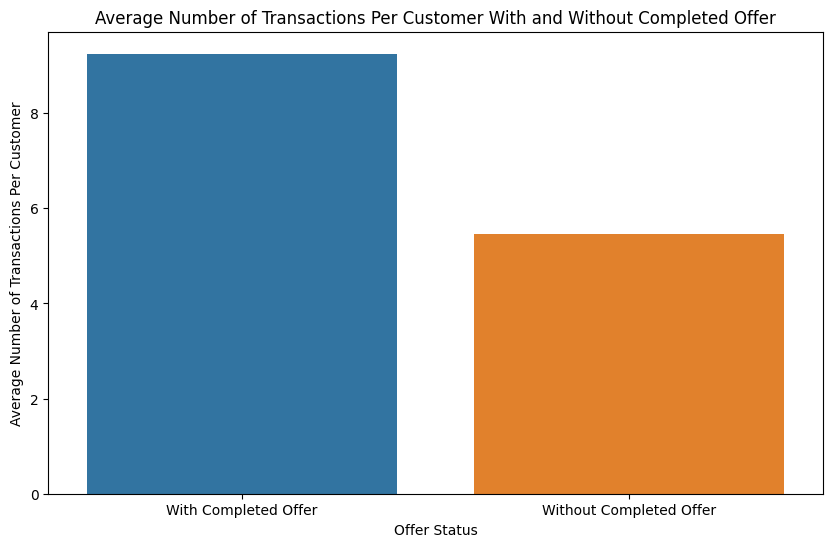

(9.251448254266478, 5.461356466876971)

In [21]:
# Calculate the average number of transactions per customer for both groups
avg_frequency_with_offer = transactions_with_completed_offers.groupby('person')['event'].count().mean()
avg_frequency_without_offer = transactions_without_completed_offers.groupby('person')['event'].count().mean()

# Plot the average number of transactions per customer for both groups
plt.figure(figsize=(10, 6))
sns.barplot(x=['With Completed Offer', 'Without Completed Offer'], y=[avg_frequency_with_offer, avg_frequency_without_offer])
plt.title('Average Number of Transactions Per Customer With and Without Completed Offer')
plt.xlabel('Offer Status')
plt.ylabel('Average Number of Transactions Per Customer')
plt.show()

# Return the average number of transactions per customer for further reference
avg_frequency_with_offer, avg_frequency_without_offer


The bar plot illustrates the comparison of the average number of transactions per customer when an offer is completed versus when no offer is completed:

The average number of transactions per customer when an offer is completed is approximately 9.25.
The average number of transactions per customer when no offer is completed is lower, at approximately 5.46.
This suggests that customers tend to have a higher frequency of transactions when they complete an offer compared to when no offer is completed.

These insights indicate that offers, especially when completed, are associated with both a higher average transaction amount and a higher frequency of transactions per customer. This suggests that offers are effective in encouraging customers to make more frequent and higher-value purchases.

With this, we have analyzed the impact of offers on customer transactions.

Step 5: Time Analysis

In this step, we will:

Check if there's a specific time when offers are more likely to be completed.
Analyze user's responsiveness to offers over time (e.g., how quickly they complete an offer after viewing it).

5.1 Time When Offers are More Likely to be Completed
We will start by visualizing the distribution of the times when offers are completed. This will help us understand if there are specific times when offers are more likely to be completed.

/var/folders/79/0qpqfg450332kfy8c8r0z4fh0000gn/T/ipykernel_1229/145208495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_offers_data['time_days'] = completed_offers_data['time'] / 24


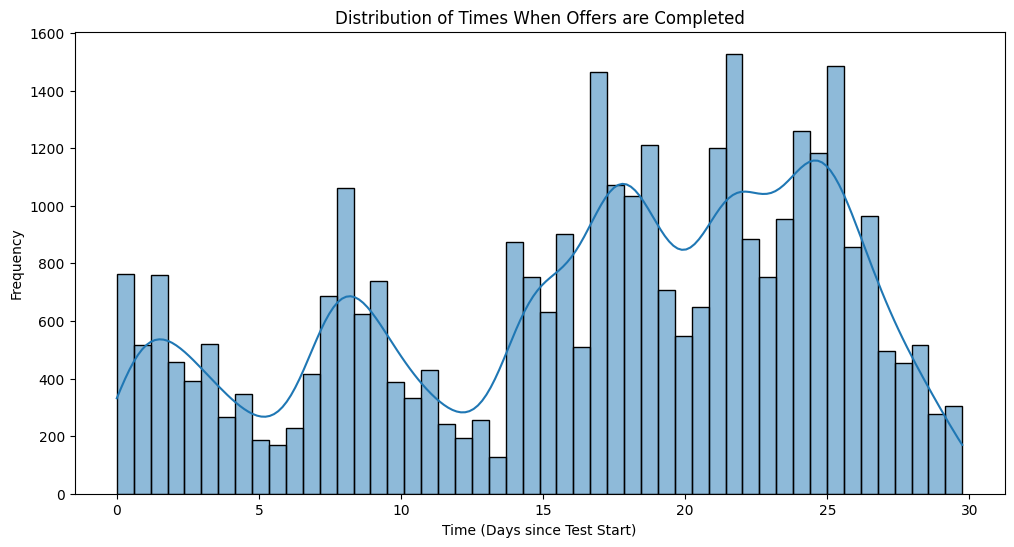

In [24]:
# Filter the data for offer completed events
completed_offers_data = merged_data[merged_data['event'] == 'offer completed']

# Convert time from hours to days for better interpretation
completed_offers_data['time_days'] = completed_offers_data['time'] / 24

# Plot the distribution of times when offers are completed
plt.figure(figsize=(12, 6))
sns.histplot(completed_offers_data['time_days'], bins=50, kde=True)
plt.title('Distribution of Times When Offers are Completed')
plt.xlabel('Time (Days since Test Start)')
plt.ylabel('Frequency')
plt.show()



The histogram illustrates the distribution of times when offers are completed:

The distribution shows several prominent peaks. These peaks likely correspond to the times when new offers are sent out to users, prompting them to make purchases and complete the offers.
Offers are frequently completed at various times throughout the test period, with notable peaks observed around days 7, 14, 17, 21, and 24 since the test started.
This suggests that there are specific times when offers are more likely to be completed, which likely aligns with the timing of when new offers are sent out to users.

5.2 User's Responsiveness to Offers Over Time

To analyze how quickly users tend to complete an offer after viewing it, we will calculate the time difference between when an offer is viewed and when it is completed for each user and offer pair. We will then visualize the distribution of these time differences.

This will help us understand the general responsiveness of users to offers.

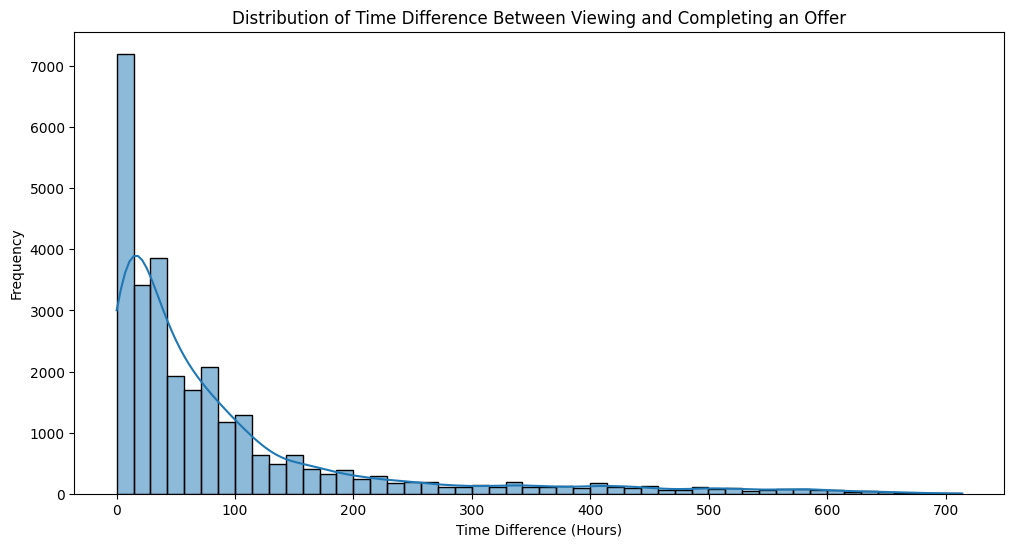

In [25]:
# Filter the data for offer viewed events
offers_viewed_data = merged_data[merged_data['event'] == 'offer viewed']

# Merge the viewed offers data with the completed offers data
viewed_and_completed = pd.merge(offers_viewed_data, completed_offers_data, on=['person', 'offer_id'], how='inner', suffixes=('_viewed', '_completed'))

# Calculate the time difference between when an offer is viewed and when it is completed
viewed_and_completed['time_diff'] = viewed_and_completed['time_completed'] - viewed_and_completed['time_viewed']

# Filter for cases where the offer is completed after being viewed
viewed_and_completed_positive_time_diff = viewed_and_completed[viewed_and_completed['time_diff'] >= 0]

# Plot the distribution of time differences (in hours)
plt.figure(figsize=(12, 6))
sns.histplot(viewed_and_completed_positive_time_diff['time_diff'], bins=50, kde=True)
plt.title('Distribution of Time Difference Between Viewing and Completing an Offer')
plt.xlabel('Time Difference (Hours)')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the distribution of time differences between viewing and completing an offer:

A large number of offers are completed shortly after being viewed, as indicated by the prominent peak close to 0 hours. This suggests that many users act quickly after viewing an offer.
The distribution is right-skewed, indicating that while most users complete offers shortly after viewing them, there are also users who take a longer time to complete the offers.

There are fewer instances as the time difference increases, indicating that as more time passes after viewing an offer, users are less likely to complete it.
This analysis suggests that:

Users are generally quite responsive to offers, with a significant proportion completing the offer shortly after viewing it.
There is a wide range of responsiveness among users, with some acting almost immediately upon viewing an offer and others taking a longer time.

This information is valuable for understanding how quickly offers might lead to conversions (i.e., offer completions) and can inform the timing and frequency of sending out new offers to customers.

In [ ]:
--End of analysis--

Next Steps Based on Initial Analysis:

After conducting a thorough analysis of the Starbucks dataset, we have gained valuable insights into customer demographics, offer types, and customer behavior. These insights have been instrumental in shaping the direction of this project.

The analysis revealed patterns and potential opportunities for creating a more personalized and effective offer strategy for Starbucks. This includes identifying which offers are most likely to be completed by different demographic groups, and under what conditions these offers are most effective.

Based on the findings from this initial analysis, we have identified the following key next steps for this project:

1. Data Preparation and Cleaning: Ensuring the data is clean and structured appropriately for the modeling process.
2. Feature Engineering: Crafting new features that can better capture the relationships in the data.
3. Machine Learning Modeling: Building and training a model to predict the likelihood of a customer completing an offer based on various features.
4. Building a Recommendation Engine: Using the trained model to power a recommendation system that can suggest the most appropriate offer to a given customer based on their demographic information.

These next steps are designed to leverage the insights gained from this analysis and create a practical, actionable solution for Starbucks.

For a detailed description of the methodology, the machine learning model used, and the architecture of the recommendation engine, please refer to the `README.md` file in this project repository.
